In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn import datasets
import seaborn as sns

In [2]:
def pca_analysis(descriptors, title=None):
    pca = PCA()
    comps = pca.fit_transform(StandardScaler().fit_transform(descriptors))
    pd_comps = pd.DataFrame(comps)
    pd_comps.columns = ['PC{}'.format(i+1) for i in pd_comps.columns]

    df_pca = pd.DataFrame({'Variance Explained, %': pca.explained_variance_ratio_,
                           'Principal Components': pd_comps.columns})
    sns.barplot(x=df_pca.columns[1], y=df_pca.columns[0], data=df_pca)
    if title is not None:
        plt.title(title)
        plt.savefig(title, dpi = 200)
    print(pd_comps)
    print(pca.explained_variance_ratio_) 
    print(pca.explained_variance_ratio_.sum())

In [3]:
def calculate_metrics(Y_test, Y_pred):
    r2, rmse = r2_score(Y_test, Y_pred), mean_squared_error(Y_test, Y_pred, squared=False)
    print(f'Best metrics:\nR\N{SUPERSCRIPT TWO}: {r2:.5f}\nRMSE: {rmse:.5f}')
    return r2, rmse

In [4]:
df = pd.read_excel('alkanes.xlsx')
df.drop(['[NAME]', 'pressure', 'Notes'], axis=1, inplace=True)
df.rename({'visc' : 'viscosity'}, axis=1, inplace=True)
df

C#      T  viscosity  density
0     8   20.0      0.542    703.0
1     8   25.0      0.510    698.6
2     8   50.0      0.387    678.2
3     8   50.0      0.387    678.2
4     8   75.0      0.304    657.2
..   ..    ...        ...      ...
163  15   60.0      1.346    740.4
164  15   70.0      1.162    733.3
165  15   80.0      1.013    726.2
166  15   90.0      0.892    719.1
167  15  100.0      0.790    712.1

[168 rows x 4 columns]

In [5]:
train_data = df[df['viscosity'].notna() & df['density'].notna()] # density and viscosity is not NaN
data_for_dens = df[df['density'].isna()] # density is NaN, viscosity is not
data_for_visc = df[df['viscosity'].isna()] # viscosity is NaN, density is not

In [6]:
train_data.shape[0] + data_for_dens.shape[0] + data_for_visc.shape[0]

168

In [7]:
density_features = train_data.iloc[:, :3]
density = train_data.iloc[:, 3]
viscosity_features = train_data.iloc[:, [0, 1, 3]]
viscosity = train_data.iloc[:, 2]

         PC1       PC2       PC3
0  -0.862371 -2.159037 -0.035335
1  -0.964009 -2.078972 -0.015338
2  -1.423059 -1.678357  0.131970
3  -1.423059 -1.678357  0.131970
4  -1.828985 -1.277433  0.330437
..       ...       ...       ...
71  1.444327  1.110958 -0.313266
72  1.081681  1.270162 -0.426748
73  0.765518  1.429636 -0.495467
74  0.486541  1.589326 -0.528374
75  0.232798  1.749164 -0.536980

[76 rows x 3 columns]
[0.61230452 0.35517156 0.03252391]
1.0


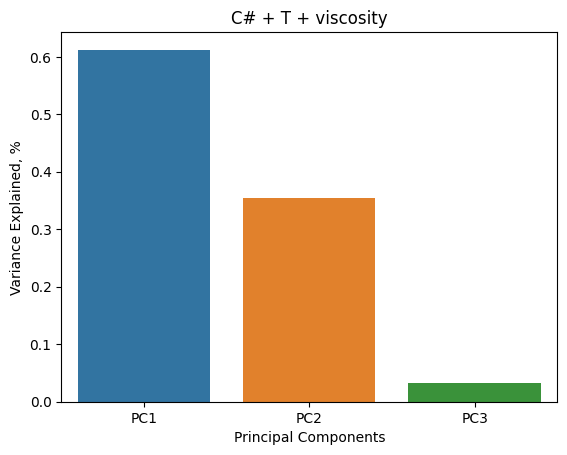

In [8]:
pca_analysis(density_features, 'C# + T + viscosity')

         PC1       PC2       PC3
0   0.090749  2.237050  0.081697
1   0.250184  2.185472  0.093630
2   1.015911  1.925971  0.122731
3   1.015911  1.925971  0.122731
4   1.793430  1.667074  0.163293
..       ...       ...       ...
71 -1.183273 -1.412812  0.111953
72 -0.897817 -1.517678  0.103345
73 -0.612360 -1.622545  0.094738
74 -0.326903 -1.727411  0.086130
75 -0.043412 -1.832377  0.075612

[76 rows x 3 columns]
[0.64648722 0.35176439 0.00174839]
0.9999999999999999


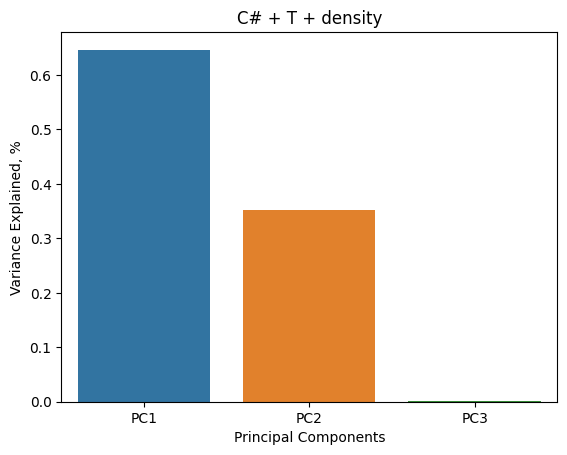

In [9]:
pca_analysis(viscosity_features, 'C# + T + density')

In [10]:
density_features.head(10)

C#      T  viscosity
0   8   20.0     0.5420
1   8   25.0     0.5100
2   8   50.0     0.3870
3   8   50.0     0.3870
4   8   75.0     0.3040
5   8   75.0     0.3040
6   8  100.0     0.2450
7   9   20.0     0.7139
8   9   30.0     0.6170
9   9   40.0     0.5460

In [11]:
density.head(10)

0    703.00
1    698.60
2    678.20
3    678.20
4    657.20
5    657.20
6    635.30
7    717.63
8    710.20
9    702.50
Name: density, dtype: float64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    density_features, density, test_size=0.2, random_state=42)

In [13]:
lin_regr_dens = LinearRegression()
lin_regr_dens.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = lin_regr_dens.predict(x_test)
calculate_metrics(y_test, y_pred)

Best metrics:
R²: 0.99469
RMSE: 3.20268


(0.9946851596652613, 3.2026757166375903)

In [15]:
data_for_dens.head(15)

C#          T  viscosity  density
11   9   1.666667      0.942      NaN
12   9   4.444444      0.902      NaN
13   9   7.222222      0.865      NaN
14   9  10.000000      0.830      NaN
15   9  12.777778      0.797      NaN
16   9  15.555556      0.766      NaN
17   9  18.333333      0.737      NaN
18   9  21.111111      0.709      NaN
19   9  23.888889      0.683      NaN
20   9  26.666667      0.659      NaN
21   9  29.444444      0.635      NaN
22   9  32.222222      0.613      NaN
23   9  35.000000      0.592      NaN
24   9  37.777778      0.573      NaN
25   9  40.555556      0.554      NaN

In [16]:
pred_dens = lin_regr_dens.predict(data_for_dens.iloc[:, :3])
predicted_dens_data = data_for_dens.iloc[:, :3]
predicted_dens_data['predicted density'] = pred_dens
predicted_dens_data

C#          T  viscosity  predicted density
11    9   1.666667      0.942         731.408679
12    9   4.444444      0.902         729.409114
13    9   7.222222      0.865         727.392180
14    9  10.000000      0.830         725.363667
15    9  12.777778      0.797         723.323575
..   ..        ...        ...                ...
144  14  84.460000      0.807         719.577922
145  14  84.460000      0.806         719.583711
146  14  84.460000      0.807         719.577922
147  14  84.460000      0.804         719.595290
148  14  84.460000      0.808         719.572132

[65 rows x 4 columns]

In [17]:
viscosity_features.head(10)

C#      T  density
0   8   20.0   703.00
1   8   25.0   698.60
2   8   50.0   678.20
3   8   50.0   678.20
4   8   75.0   657.20
5   8   75.0   657.20
6   8  100.0   635.30
7   9   20.0   717.63
8   9   30.0   710.20
9   9   40.0   702.50

In [18]:
viscosity.head(10)

0    0.5420
1    0.5100
2    0.3870
3    0.3870
4    0.3040
5    0.3040
6    0.2450
7    0.7139
8    0.6170
9    0.5460
Name: viscosity, dtype: float64

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(
    viscosity_features, viscosity, test_size=0.25, random_state=35)

In [20]:
lin_regr_visc = LinearRegression()
lin_regr_visc.fit(X_train, Y_train)

LinearRegression()

In [21]:
Y_pred = lin_regr_visc.predict(X_test)
calculate_metrics(Y_test, Y_pred)

Best metrics:
R²: 0.86353
RMSE: 0.19060


(0.863529394983332, 0.19059597280597734)

In [22]:
kf = KFold(n_splits=4, random_state=35, shuffle=True)

In [23]:
gs = GridSearchCV(KNeighborsRegressor(), 
                  {'n_neighbors': np.arange(1, 5+1), 
                   'algorithm': ['ball_tree', 'kd_tree', 'brute']}, 
                  cv = kf, verbose=1, scoring='r2', n_jobs=-1)

In [24]:
gs.fit(X_train, Y_train)
best_knn = gs.best_estimator_
best_knn

Fitting 4 folds for each of 15 candidates, totalling 60 fits


KNeighborsRegressor(algorithm='ball_tree', n_neighbors=1)

In [25]:
Y_pred_knn = best_knn.predict(X_test)
r2_knn, rmse_knn = calculate_metrics(Y_test, Y_pred_knn)

Best metrics:
R²: 0.96241
RMSE: 0.10004


In [26]:
gs_forest = GridSearchCV(RandomForestRegressor(random_state=35), 
                      {'max_depth': [2, 10, 20, 50, 70], 
                      'n_estimators': [50, 100, 150, 200, 250], 
                      'max_features': ['sqrt', 'log2', None]},
                      cv = kf, verbose=1, scoring='r2', n_jobs=-1)

In [27]:
gs_forest.fit(X_train, Y_train)
best_forest = gs_forest.best_estimator_
best_forest

Fitting 4 folds for each of 75 candidates, totalling 300 fits


RandomForestRegressor(max_depth=10, max_features=None, random_state=35)

In [28]:
Y_pred_forest = best_forest.predict(X_test)
r2_forest, rmse_forest = calculate_metrics(Y_test, Y_pred_forest)

Best metrics:
R²: 0.99147
RMSE: 0.04765


In [29]:
data_for_visc.head(15)

C#          T  viscosity     density
29   9 -17.777778        NaN  749.986170
30   9 -12.222222        NaN  745.340805
31   9  -6.666667        NaN  740.535255
32   9  -1.111111        NaN  735.889890
33   9   4.444444        NaN  731.084340
34   9  10.000000        NaN  726.438975
35   9  15.555556        NaN  721.633425
36   9  21.111111        NaN  716.988060
37   9  26.666667        NaN  712.342695
38   9  32.222222        NaN  707.537145
39   9  37.777778        NaN  702.891780
40   9  43.333333        NaN  698.086230
41   9  48.888889        NaN  693.440865
42   9  54.444444        NaN  688.635315
43   9  60.000000        NaN  683.989950

In [30]:
predicted_visc_data = data_for_visc.iloc[:, [0, 1, 3]]

In [31]:
pred_visc_lin = lin_regr_visc.predict(data_for_visc.iloc[:, [0, 1, 3]])
predicted_visc_data['predicted viscosity linear'] = pred_visc_lin

In [32]:
pred_visc_knn = best_knn.predict(data_for_visc.iloc[:, [0, 1, 3]])
predicted_visc_data['predicted viscosity knn'] = pred_visc_knn

In [33]:
pred_visc_forest = best_forest.predict(data_for_visc.iloc[:, [0, 1, 3]])
predicted_visc_data['predicted viscosity forest'] = pred_visc_forest
predicted_visc_data

C#           T     density  predicted viscosity linear  \
29    9  -17.777778  749.986170                    0.999498   
30    9  -12.222222  745.340805                    0.964104   
31    9   -6.666667  740.535255                    0.932632   
32    9   -1.111111  735.889890                    0.897239   
33    9    4.444444  731.084340                    0.865767   
34    9   10.000000  726.438975                    0.830373   
35    9   15.555556  721.633425                    0.798901   
36    9   21.111111  716.988060                    0.763507   
37    9   26.666667  712.342695                    0.728114   
38    9   32.222222  707.537145                    0.696642   
39    9   37.777778  702.891780                    0.661248   
40    9   43.333333  698.086230                    0.629776   
41    9   48.888889  693.440865                    0.594383   
42    9   54.444444  688.635315                    0.562911   
43    9   60.000000  683.989950                    0.527517   
44    9   65.555556  679.184400                    0.496045   
45    9   71.111111  674.539035                    0.460651   
46    9   76.666667  669.733485                    0.429179   
149  14   10.000000  770.000000                    1.851799   
150  14   15.000000  766.400000                    1.805725   
151  14   20.000000  762.900000                    1.757203   
152  14   25.000000  759.400000                    1.708681   
153  14   35.000000  752.300000                    1.614085   
154  14   45.000000  745.400000                    1.514593   
155  14   65.000000  731.400000                    1.320505   
156  14   85.000000  717.200000                    1.131314   
157  14  100.000000  706.500000                    0.990644   

     predicted viscosity knn  predicted viscosity forest  
29                    1.4940                    1.566760  
30                    1.4940                    1.421950  
31                    1.4940                    1.343285  
32                    0.9256                    1.111667  
33                    0.9256                    0.948360  
34                    0.9256                    0.869262  
35                    0.9256                    0.828430  
36                    0.8490                    0.759602  
37                    0.5420                    0.746580  
38                    0.5460                    0.624620  
39                    0.5460                    0.551028  
40                    0.5460                    0.538968  
41                    0.4869                    0.505379  
42                    0.4869                    0.467385  
43                    0.3870                    0.462528  
44                    0.4580                    0.398919  
45                    0.4580                    0.384240  
46                    0.3040                    0.377840  
149                   2.8590                    2.525320  
150                   2.8590                    2.525320  
151                   2.3350                    2.404800  
152                   2.3350                    2.133450  
153                   1.8850                    1.801640  
154                   1.5800                    1.373810  
155                   1.1620                    0.979057  
156                   0.8920                    0.798596  
157                   0.7900                    0.651400

In [34]:
vd_ind = train_data.index
dens_na_ind = data_for_dens.index
visc_na_ind = data_for_visc.index
vd_dens_na = np.concatenate((vd_ind, dens_na_ind))
vd_visc_na = np.concatenate((vd_ind, visc_na_ind))
new_data = df
new_data['predicted viscosity'] = np.nan
new_data['predicted density'] = np.nan
new_data.iloc[vd_dens_na, 5] = lin_regr_dens.predict(new_data.iloc[vd_dens_na, :3])
new_data.iloc[vd_visc_na, 4] = best_forest.predict(new_data.iloc[vd_visc_na, [0, 1, 3]])
new_data

C#      T  viscosity  density  predicted viscosity  predicted density
0     8   20.0      0.542    703.0             0.549350         708.221262
1     8   25.0      0.510    698.6             0.525200         704.390464
2     8   50.0      0.387    678.2             0.398639         685.022263
3     8   50.0      0.387    678.2             0.398639         685.022263
4     8   75.0      0.304    657.2             0.306266         665.422480
..   ..    ...        ...      ...                  ...                ...
163  15   60.0      1.346    740.4             1.297180         746.881612
164  15   70.0      1.162    733.3             1.117515         739.914757
165  15   80.0      1.013    726.2             0.956790         732.745270
166  15   90.0      0.892    719.1             0.854508         725.413676
167  15  100.0      0.790    712.1             0.773740         717.972081

[168 rows x 6 columns]

In [35]:
nonane = df[df['C#'] == 9]
nonane = nonane.sort_values(by=['T', 'viscosity'])
nonane.head(20)

C#          T  viscosity     density  predicted viscosity  \
29   9 -17.777778        NaN  749.986170             1.566760   
30   9 -12.222222        NaN  745.340805             1.421950   
31   9  -6.666667        NaN  740.535255             1.343285   
32   9  -1.111111        NaN  735.889890             1.111667   
11   9   1.666667     0.9420         NaN                  NaN   
12   9   4.444444     0.9020         NaN                  NaN   
33   9   4.444444        NaN  731.084340             0.948360   
13   9   7.222222     0.8650         NaN                  NaN   
14   9  10.000000     0.8300         NaN                  NaN   
34   9  10.000000        NaN  726.438975             0.869262   
15   9  12.777778     0.7970         NaN                  NaN   
16   9  15.555556     0.7660         NaN                  NaN   
35   9  15.555556        NaN  721.633425             0.828430   
17   9  18.333333     0.7370         NaN                  NaN   
7    9  20.000000     0.7139  717.630000             0.786388   
18   9  21.111111     0.7090         NaN                  NaN   
36   9  21.111111        NaN  716.988060             0.759602   
19   9  23.888889     0.6830         NaN                  NaN   
20   9  26.666667     0.6590         NaN                  NaN   
37   9  26.666667        NaN  712.342695             0.746580   

    predicted density  
29                NaN  
30                NaN  
31                NaN  
32                NaN  
11         731.408679  
12         729.409114  
33                NaN  
13         727.392180  
14         725.363667  
34                NaN  
15         723.323575  
16         721.271905  
35                NaN  
17         719.208655  
7          718.003705  
18         717.139615  
36                NaN  
19         715.058997  
20         712.966799  
37                NaN

In [36]:
nonane_data = nonane.drop(index=vd_ind, errors='ignore')
nonane_data = nonane_data.reset_index(drop=True)
nonane_data.head(20)

C#          T  viscosity     density  predicted viscosity  \
0    9 -17.777778        NaN  749.986170             1.566760   
1    9 -12.222222        NaN  745.340805             1.421950   
2    9  -6.666667        NaN  740.535255             1.343285   
3    9  -1.111111        NaN  735.889890             1.111667   
4    9   1.666667      0.942         NaN                  NaN   
5    9   4.444444      0.902         NaN                  NaN   
6    9   4.444444        NaN  731.084340             0.948360   
7    9   7.222222      0.865         NaN                  NaN   
8    9  10.000000      0.830         NaN                  NaN   
9    9  10.000000        NaN  726.438975             0.869262   
10   9  12.777778      0.797         NaN                  NaN   
11   9  15.555556      0.766         NaN                  NaN   
12   9  15.555556        NaN  721.633425             0.828430   
13   9  18.333333      0.737         NaN                  NaN   
14   9  21.111111      0.709         NaN                  NaN   
15   9  21.111111        NaN  716.988060             0.759602   
16   9  23.888889      0.683         NaN                  NaN   
17   9  26.666667      0.659         NaN                  NaN   
18   9  26.666667        NaN  712.342695             0.746580   
19   9  29.444444      0.635         NaN                  NaN   

    predicted density  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4          731.408679  
5          729.409114  
6                 NaN  
7          727.392180  
8          725.363667  
9                 NaN  
10         723.323575  
11         721.271905  
12                NaN  
13         719.208655  
14         717.139615  
15                NaN  
16         715.058997  
17         712.966799  
18                NaN  
19         710.874602

In [37]:
tetradecane = df[df['C#'] == 14]
tetradecane = tetradecane.sort_values(by=['T', 'viscosity'])
tetradecane.head(20)

C#      T  viscosity  density  predicted viscosity  predicted density
103  14   9.98      2.881      NaN                  NaN         767.393743
104  14   9.98      2.888      NaN                  NaN         767.353216
102  14   9.98      2.891      NaN                  NaN         767.335847
149  14  10.00        NaN    770.0              2.52532                NaN
106  14  12.17      2.727      NaN                  NaN         766.526292
109  14  12.17      2.729      NaN                  NaN         766.514713
105  14  12.17      2.731      NaN                  NaN         766.503134
107  14  12.17      2.735      NaN                  NaN         766.479976
108  14  12.17      2.735      NaN                  NaN         766.479976
112  14  14.65      2.570      NaN                  NaN         765.443278
113  14  14.65      2.571      NaN                  NaN         765.437488
114  14  14.65      2.572      NaN                  NaN         765.431699
115  14  14.65      2.573      NaN                  NaN         765.425909
111  14  14.65      2.577      NaN                  NaN         765.402751
110  14  14.65      2.582      NaN                  NaN         765.373804
116  14  14.65      2.585      NaN                  NaN         765.356435
150  14  15.00        NaN    766.4              2.52532                NaN
117  14  19.63      2.307      NaN                  NaN         762.965921
118  14  19.63      2.308      NaN                  NaN         762.960131
119  14  19.63      2.312      NaN                  NaN         762.936973

In [38]:
tetradecane_data = tetradecane.drop(index=vd_ind, errors='ignore')
tetradecane_data = tetradecane_data.reset_index(drop=True)
tetradecane_data.head(20)

C#      T  viscosity  density  predicted viscosity  predicted density
0   14   9.98      2.881      NaN                  NaN         767.393743
1   14   9.98      2.888      NaN                  NaN         767.353216
2   14   9.98      2.891      NaN                  NaN         767.335847
3   14  10.00        NaN    770.0              2.52532                NaN
4   14  12.17      2.727      NaN                  NaN         766.526292
5   14  12.17      2.729      NaN                  NaN         766.514713
6   14  12.17      2.731      NaN                  NaN         766.503134
7   14  12.17      2.735      NaN                  NaN         766.479976
8   14  12.17      2.735      NaN                  NaN         766.479976
9   14  14.65      2.570      NaN                  NaN         765.443278
10  14  14.65      2.571      NaN                  NaN         765.437488
11  14  14.65      2.572      NaN                  NaN         765.431699
12  14  14.65      2.573      NaN                  NaN         765.425909
13  14  14.65      2.577      NaN                  NaN         765.402751
14  14  14.65      2.582      NaN                  NaN         765.373804
15  14  14.65      2.585      NaN                  NaN         765.356435
16  14  15.00        NaN    766.4              2.52532                NaN
17  14  19.63      2.307      NaN                  NaN         762.965921
18  14  19.63      2.308      NaN                  NaN         762.960131
19  14  19.63      2.312      NaN                  NaN         762.936973

In [39]:
def plots(data, name_title):
    X = data["T"]
    
    y_true_density = data["density"]
    y_predict_density = data["predicted density"]

    plt.title(name_title)
    plt.plot(X, y_true_density, '^', label="existing density")
    plt.plot(X, y_predict_density, 'o', label="predicted density")
    plt.legend()
    plt.grid()
    plt.xlabel("T, °С")
    plt.ylabel("Density, kg/m^3")
    plt.savefig('Density of '+ name_title, dpi = 200)
    plt.show()
    
    y_true_viscosity = data["viscosity"]
    y_predict_viscosity = data["predicted viscosity"]
    
    plt.title(name_title)
    plt.plot(X, y_true_viscosity, '^', label="existing viscosity")
    plt.plot(X, y_predict_viscosity, 'o', label="predicted viscosity")
    plt.legend()
    plt.grid()
    plt.xlabel("T, °С")
    plt.ylabel("Viscosity, mPa*s")
    plt.savefig('Viscosity of '+ name_title, dpi = 200)
    plt.show()

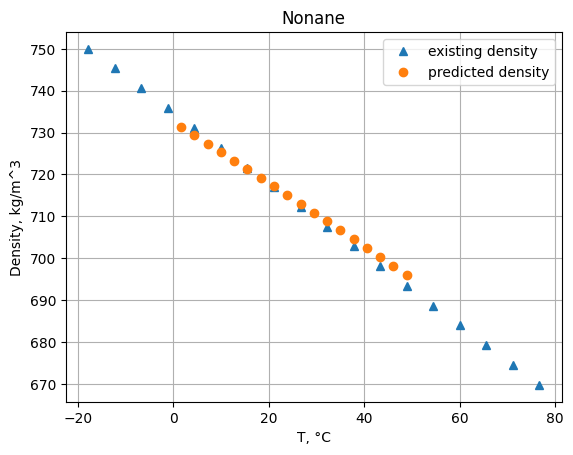

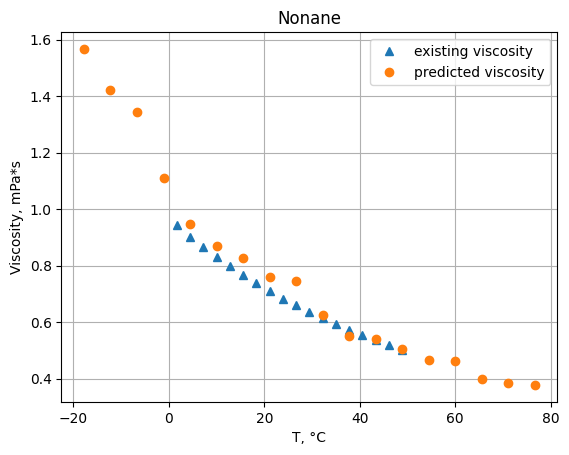

In [40]:
plots(nonane_data, name_title = "Nonane")

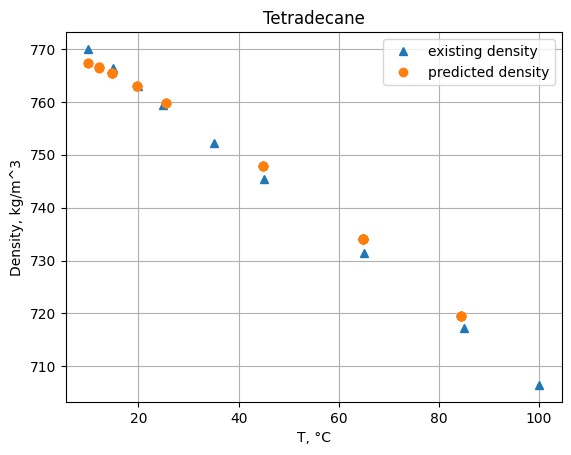

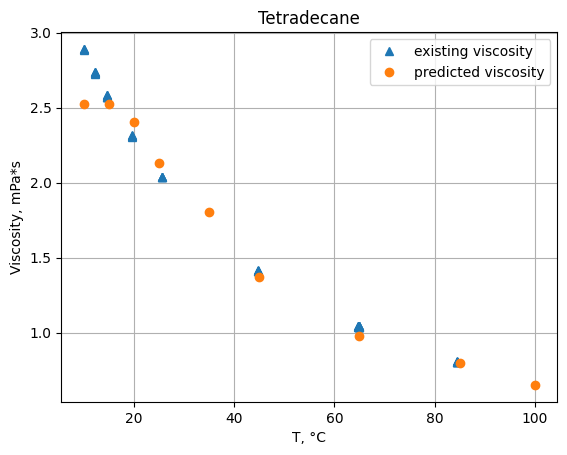

In [41]:
plots(tetradecane_data, name_title = "Tetradecane")